<a href="https://colab.research.google.com/github/larasauser/master/blob/main/LCLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


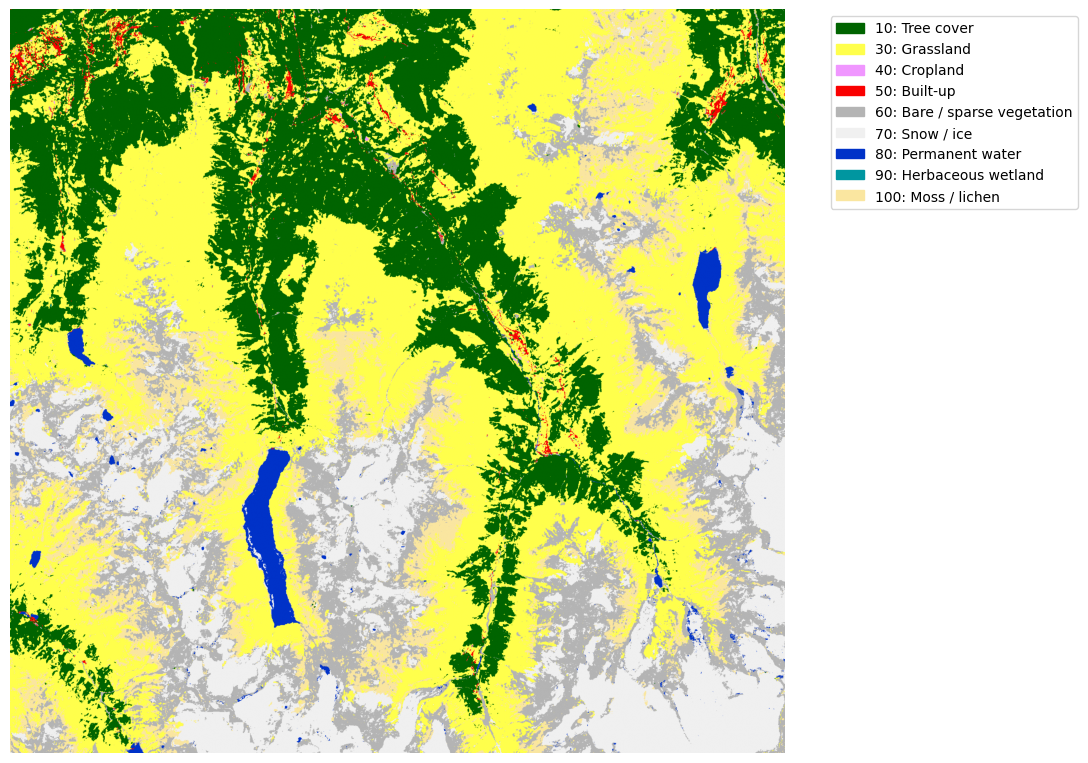

In [9]:
# ----------------------------
# 1️⃣ Installer et importer les bibliothèques
!pip install rasterio matplotlib numpy

import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ----------------------------
# 2️⃣ Charger l'image GeoTIFF
# Remplace le chemin par le chemin réel dans ton Drive monté
tif_path = '/content/drive/MyDrive/LCLU_rprj/LCLU_ROI1.tif'

with rasterio.open(tif_path) as src:
    img = src.read(1)  # lire la première (et seule) bande
    profile = src.profile

# ----------------------------
# 3️⃣ Définir la palette de couleurs pour les classes LCLU
# Dictionnaire code → nom
lc_dict = {
    10: 'Tree cover',
    30: 'Grassland',
    40: 'Cropland',
    50: 'Built-up',
    60: 'Bare / sparse vegetation',
    70: 'Snow / ice',
    80: 'Permanent water',
    90: 'Herbaceous wetland',
    100:'Moss / lichen'
}
# Même ordre que lc_dict
colors = {
    10: '#006400',  # Tree cover
    30: '#ffff4c',  # Grassland
    40: '#f096ff',  # Cropland
    50: '#fa0000',  # Built-up
    60: '#b4b4b4',  # Bare / sparse vegetation
    70: '#f0f0f0',  # Snow / ice
    80: '#0032c8',  # Permanent water
    90: '#0096a0',  # Herbaceous wetland
    100:'#fae6a0'   # Moss / lichen
}

# Créer une colormap
codes = list(colors.keys())
palette = list(colors.values())
cmap = ListedColormap(palette)

# Créer une image mappée à l'indice de la palette
code_to_index = {code:i for i, code in enumerate(codes)}
img_indexed = np.vectorize(code_to_index.get)(img)

# ----------------------------
# 4️⃣ Afficher l'image avec légende de couleurs
plt.figure(figsize=(10,10))
plt.imshow(img_indexed, cmap=cmap)
plt.axis('off')

# Légende
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[c], label=f"{c}: {lc_dict[c]}") for c in codes]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




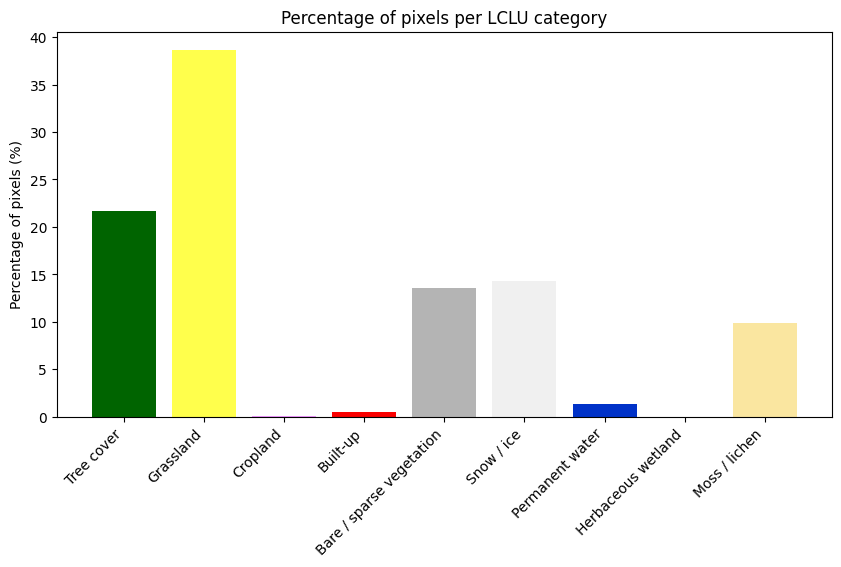

In [10]:
# ----------------------------
# Calculer l'histogramme des pixels par classe
unique, counts = np.unique(img, return_counts=True)

# Total des pixels
total_pixels = counts.sum()

# Calculer les pourcentages
percentages = counts / total_pixels * 100

# ----------------------------
# Afficher l'histogramme avec pourcentages et noms seulement
plt.figure(figsize=(10,5))
plt.bar([lc_dict[u] for u in unique], percentages, color=[colors[u] for u in unique])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of pixels (%)')
plt.title('Percentage of pixels per LCLU category')
plt.show()